# Sparse Matrices and Graphs

In [1]:
import scipy.sparse as sp
import scipy.sparse.linalg as spl

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
values = [1,2,3,4]
rows = [0,1,2,3]
cols = [1,3,2,0]
A = sp.coo_matrix((values, (rows, cols)), shape=[4,4])
A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [3]:
A.shape, A.size, A.dtype, A.ndim

((4, 4), 4, dtype('int64'), 2)

In [4]:
A.nnz, A.data

(4, array([1, 2, 3, 4]))

In [5]:
A.row

array([0, 1, 2, 3], dtype=int32)

In [6]:
A.col

array([1, 3, 2, 0], dtype=int32)

In [7]:
A.tocsr()

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [8]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [9]:
A = np.array([[1,2,0,0], [0,3,4,0], [0,0,5,6], [7,0,8,9]])
A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [10]:
A = sp.csr_matrix(A)
A.data

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
A.indices

array([0, 1, 1, 2, 2, 3, 0, 2, 3], dtype=int32)

In [12]:
A.indptr

array([0, 2, 4, 6, 9], dtype=int32)

In [13]:
i = 2
A.indptr[i], A.indptr[i+1]-1

(4, 5)

In [14]:
A.indices[A.indptr[i]:A.indptr[i+1]]

array([2, 3], dtype=int32)

In [15]:
A.data[A.indptr[i]:A.indptr[i+1]]

array([5, 6])

In [16]:
A[2,2], A[2,3]

(5, 6)

In [18]:
N = 10
A = sp.eye(N,k=1)-2*sp.eye(N)+sp.eye(N,k=-1)
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [19]:
A = sp.diags([1,-2,1],[1,0,-1], shape=[N,N], format='csc')
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

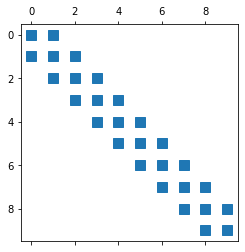

In [20]:
fig, ax = plt.subplots()
ax.spy(A)

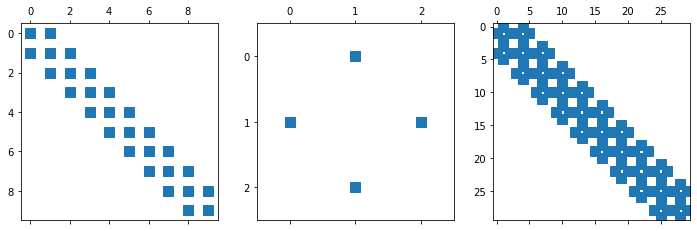

In [22]:
B = sp.diags([1,1],[-1,1], shape=[3,3])
C = sp.kron(A,B)
fig, (ax_A, ax_B, ax_C) = plt.subplots(1,3,figsize=(12,4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)

In [23]:
N = 10
A = sp.diags([1,-2,1],[1,0,-1], shape=[N,N], format='csc')
b = -np.ones(N)

In [25]:
x = spl.spsolve(A,b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [26]:
np.linalg.solve(A.todense(),b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [27]:
lu = sp.linalg.splu(A)
lu.L

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [28]:
lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [29]:
x = lu.solve(b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [33]:
def sp_permute(A,perm_r, perm_c):
    M,N = A.shape
    Pr = sp.coo_matrix((np.ones(M), (perm_r, np.arange(N)))).tocsr()
    Pc = sp.coo_matrix((np.ones(M), (np.arange(M),perm_c ))).tocsr()
    return Pr.T*A*Pc.T

In [34]:
lu.L*lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

In [35]:
sp_permute(lu.L*lu.U, lu.perm_r, lu.perm_c)-A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

In [36]:
x, info = sp.linalg.bicgstab(A,b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [38]:
x,info = sp.linalg.lgmres(A,b, atol=0.0001)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [39]:
N = 10
A = sp.diags([1,-2,1],[1,0,-1], shape=[N,N], format='csc')
evals, evecs = spl.eigs(A,k=4, which='LM')
evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [40]:
np.allclose(A.dot(evecs[:,0]), evals[0]*evecs[:,0])

True

In [43]:
evals, evecs = spl.eigsh(A,k=4,which='LM') #'SM'
evals

array([-3.91898595, -3.68250707, -3.30972147, -2.83083003])

In [45]:
evals, evecs = spl.eigs(A,k=4,which='SM') #'SM'
evals

array([-0.08101405+0.j, -0.31749293+0.j, -0.69027853+0.j, -1.16916997+0.j])

In [46]:
np.real((evals).argsort())

array([3, 2, 1, 0])

In [47]:
def sp_eigs_sorted(A, k=6, which='SR'):
    evals, evecs = spl.eigs(A,k=k, which=which)
    idx = np.real(evals).argsort()
    return evals[idx], evecs[idx]

In [48]:
evals, evecs = sp_eigs_sorted(A, k=4, which='SM')
evals

array([-1.16916997+0.j, -0.69027853+0.j, -0.31749293+0.j, -0.08101405+0.j])

In [54]:
N = 100
x_vec = np.linspace(0,1,50)
M1 = sp.rand(N,N, density=0.2)
M2 = sp.rand(N,N, density=0.2)
evals_mat = np.array([sp_eigs_sorted((1-x)*M1+ x*M2, k=25)[0] for x in x_vec])

Text(0, 0.5, 'eig.vals. of $(1-x)M_1 + xM_2$')

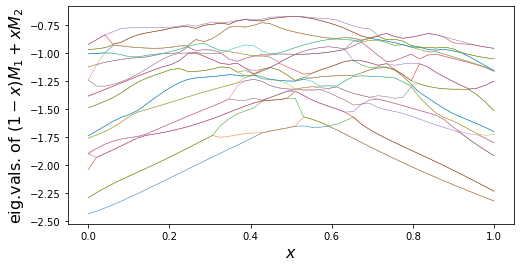

In [55]:
fig, ax = plt.subplots(figsize=(8,4))
for idx in range(evals_mat.shape[1]):
    ax.plot(x_vec, np.real(evals_mat[:,idx]), lw=0.5)
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"eig.vals. of $(1-x)M_1 + xM_2$", fontsize=16)

In [56]:
g = nx.Graph()
g.add_node(1)
g.nodes()

NodeView((1,))

In [57]:
g.add_nodes_from([3,4,5])
g.nodes()

NodeView((1, 3, 4, 5))

In [58]:
g.add_edge(1,2)
g.edges()

EdgeView([(1, 2)])

In [59]:
g.add_edges_from([(3,4), (5,6)])
g.edges()

EdgeView([(1, 2), (3, 4), (5, 6)])

In [60]:
g.add_weighted_edges_from([(1,3,1.5), (3,5,2.5)])
g.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {'weight': 1.5}), (3, 4, {}), (3, 5, {'weight': 2.5}), (5, 6, {})])

In [61]:
g.add_weighted_edges_from([(6,7,1.5)])
g.nodes()

NodeView((1, 3, 4, 5, 2, 6, 7))

In [62]:
g.edges()

EdgeView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7)])

In [63]:
import json
with open("tokyo-metro.json") as f:
    data = json.load(f)

In [65]:
data.keys()

dict_keys(['C', 'G', 'F', 'H', 'M', 'N', 'T', 'Y', 'Z'])

In [66]:
data["C"]

{'color': '#149848',
 'transfers': [['C3', 'F15'],
  ['C4', 'Z2'],
  ['C4', 'G2'],
  ['C7', 'M14'],
  ['C7', 'N6'],
  ['C7', 'G6'],
  ['C8', 'M15'],
  ['C8', 'H6'],
  ['C9', 'H7'],
  ['C9', 'Y18'],
  ['C11', 'T9'],
  ['C11', 'M18'],
  ['C11', 'Z8'],
  ['C12', 'M19'],
  ['C18', 'H21']],
 'travel_times': [['C1', 'C2', 2],
  ['C2', 'C3', 2],
  ['C3', 'C4', 1],
  ['C4', 'C5', 2],
  ['C5', 'C6', 2],
  ['C6', 'C7', 2],
  ['C7', 'C8', 1],
  ['C8', 'C9', 3],
  ['C9', 'C10', 1],
  ['C10', 'C11', 2],
  ['C11', 'C12', 2],
  ['C12', 'C13', 2],
  ['C13', 'C14', 2],
  ['C14', 'C15', 2],
  ['C15', 'C16', 2],
  ['C16', 'C17', 3],
  ['C17', 'C18', 3],
  ['C18', 'C19', 3]]}

In [68]:
g = nx.Graph()
for line in data.values():
    g.add_weighted_edges_from(line["travel_times"])
    g.add_edges_from(line['transfers'])

In [69]:
for n1, n2 in g.edges():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]

In [72]:
on_foot = [e for e in g.edges() if g.get_edge_data(*e)["transfer"]]
on_train = [e for e in g.edges() if not g.get_edge_data(*e)["transfer"]]

colors = [data[n[0].upper()]["color"] for n in g.nodes()]

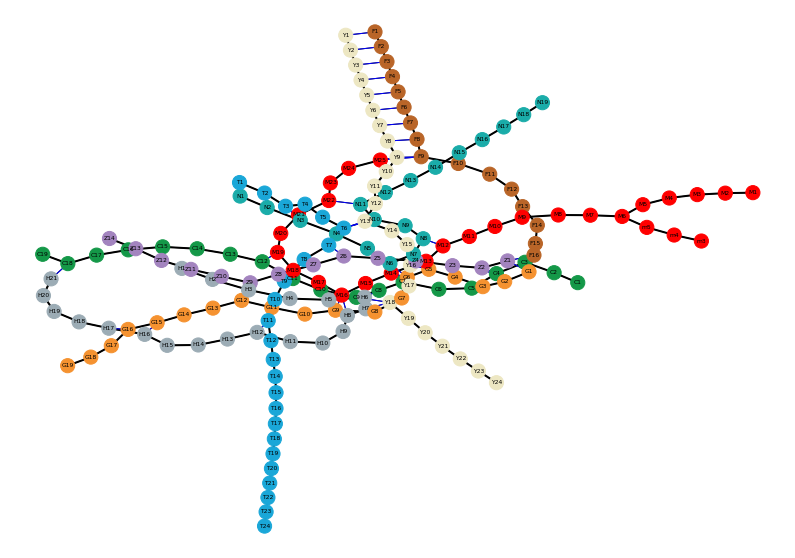

In [75]:
fig, ax = plt.subplots(1,1,figsize=(14,10))
pos = nx.drawing.nx_agraph.graphviz_layout(g,prog='neato')
nx.draw(g,pos,ax=ax,node_size=200, node_color=colors)
nx.draw_networkx_labels(g,pos=pos, ax=ax, font_size=6)
nx.draw_networkx_edges(g,pos=pos, ax=ax, edgelist=on_train, width=2)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist = on_foot, edge_color='blue')

In [76]:
g.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'F15': 3, 'Z2': 4, 'G2': 4, 'M14': 5, 'N6': 5, 'G6': 5, 'M15': 4, 'H6': 4, 'H7': 4, 'Y18': 4, 'T9': 5, 'M18': 5, 'Z8': 5, 'M19': 3, 'H21': 2, 'G1': 3, 'G3': 2, 'G4': 3, 'G5': 6, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'Z1': 3, 'F16': 3, 'Z3': 3, 'M13': 6, 'Y16': 6, 'Z4': 6, 'N7': 6, 'M16': 4, 'H8': 4, 'T10': 3, 'Z9': 3, 'H16': 3, 'H17': 3, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'Y1': 2, 'Y2': 3, 'Y3': 3, 'Y4': 3, 'Y5': 3, 'Y6': 3, 'Y7': 3, 'Y8': 3, 'Y9': 4, 'M25': 3, 'M9': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H18': 2, 'H19': 2, 'H20': 2, 'T1

In [77]:
d_max = max(d for (n,d) in g.degree())
[(n,d) for (n,d) in g.degree() if d==d_max]

[('G5', 6), ('M13', 6), ('Y16', 6), ('Z4', 6), ('N7', 6)]

In [78]:
p = nx.shortest_path(g, "Y24", "C19")
p

['Y24',
 'Y23',
 'Y22',
 'Y21',
 'Y20',
 'Y19',
 'Y18',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19']

In [79]:
np.sum([g[p[n]][p[n+1]]["weight"] for n in range(len(p)-1) if "weight" in g[p[n]][p[n+1]]])

35

In [80]:
h = g.copy()
for n1, n2 in h.edges():
    if h[n1][n2]["transfer"]:
        h[n1][n2]["weight"] = 5

In [85]:
p = nx.shortest_path(g, "Y24", "C19")
p

['Y24',
 'Y23',
 'Y22',
 'Y21',
 'Y20',
 'Y19',
 'Y18',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19']

In [86]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1) if "weight" in h[p[n]][p[n+1]]])

40

In [88]:
p = nx.shortest_path(h, "Z1", "H16")
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1) if "weight" in h[p[n]][p[n+1]]])

32

In [89]:
A = nx.to_scipy_sparse_matrix(g)
A

<184x184 sparse matrix of type '<class 'numpy.int64'>'
	with 486 stored elements in Compressed Sparse Row format>

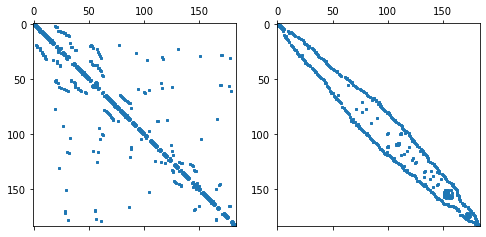

In [90]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.spy(A, markersize=2)
ax2.spy(sp_permute(A, perm, perm), markersize=2)